/home/sieben/.local/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
-c:72: FutureWarning: pd.ewm_mean is deprecated for ndarrays and will be removed in a future version
-c:73: FutureWarning: pd.ewm_mean is deprecated for ndarrays and will be removed in a future version


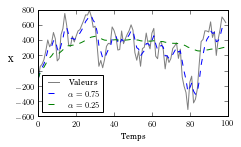

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
ewma = pandas.stats.moments.ewma
import matplotlib
from math import sqrt
SPINE_COLOR = 'gray'

def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.39 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    MAX_HEIGHT_INCHES = 8.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'text.latex.preamble': ['\\usepackage{gensymb}'],
              'axes.labelsize': 8, # fontsize for x and y labels (was 10)
              'axes.titlesize': 8,
              'text.fontsize': 8, # was 10
              'legend.fontsize': 8, # was 10
              'xtick.labelsize': 8,
              'ytick.labelsize': 8,
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
    }

    matplotlib.rcParams.update(params)

latexify()

    
    
# make a hat function, and add noise
x = np.linspace(0,1,100)
x += np.random.normal( loc=0, scale=150, size=100 )
x = x.cumsum()

# take EWMA in both directions with a smaller span term
#fwd = ewma( x, alpha=.3 ) # take EWMA in fwd direction
#bwd = ewma( x[::-1], span=15 ) # take EWMA in bwd direction
#c = np.vstack(( fwd, bwd[::-1] )) # lump fwd and bwd together
#c = np.mean( c, axis=0 ) # average
 
# regular EWMA, with bias against trend
plt.plot( x, 'k', alpha=.5, label='Valeurs')
plt.plot( ewma( x, alpha=.4 ), 'b--',  label='$\\alpha = 0.75$' )
plt.plot( ewma( x, alpha=.01 ), 'g--', label='$\\alpha = 0.25$' )
 
plt.xlim((0, 100))
plt.xlabel("Temps")
plt.ylabel("X", rotation=0)
plt.legend(loc="best")
plt.tight_layout()
plt.savefig("alpha_ewma.pdf")

In [50]:
np.random.normal( loc=50, scale=2, size=100 )

array([ 49.24073488,  50.81521611,  50.42177125,  45.2111394 ,
        52.32748333,  49.8706393 ,  49.66912451,  49.58078311,
        44.8410091 ,  51.01158292,  51.42785655,  48.74168809,
        47.75998763,  47.23898841,  52.06789198,  51.4443827 ,
        48.71279792,  55.64930899,  49.60633983,  53.83002622,
        52.62236969,  51.58635481,  51.83616235,  47.88854299,
        49.4622058 ,  51.29980633,  47.93594636,  49.91282181,
        47.25243966,  51.60649487,  46.35724508,  47.24790717,
        48.74347532,  51.211024  ,  51.14883526,  52.58927726,
        52.77282735,  48.04458173,  47.81849725,  47.5431142 ,
        47.28753956,  47.97502174,  48.90491408,  50.71348985,
        52.11487688,  48.73165002,  50.65109616,  47.20687881,
        51.69024379,  46.78992797,  50.44501873,  48.8608217 ,
        50.080312  ,  46.35635669,  50.21568698,  46.45957002,
        49.86381432,  53.33056237,  50.97866223,  52.50396601,
        52.83887933,  45.13323639,  47.45326182,  51.89